# Finance Data Fun

In [68]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
pp.style.use('seaborn-colorblind')

In [69]:
# Getting data from Inovio Pharma
ticker = yf.Ticker('PINS')
prices = ticker.history(period='1d', start='2020-1-1', end='2020-7-1')
prices

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02,18.80,19.10,18.57,18.80,6334600,0,0
2020-01-03,18.60,18.71,18.25,18.36,5203200,0,0
2020-01-06,18.27,19.35,18.22,18.91,7978900,0,0
2020-01-07,18.88,19.42,18.76,19.26,7471500,0,0
2020-01-08,19.25,19.98,19.11,19.72,7363500,0,0
...,...,...,...,...,...,...,...
2020-06-24,23.82,24.17,22.35,23.17,12040000,0,0
2020-06-25,22.94,23.49,22.36,22.58,12023100,0,0
2020-06-26,22.69,23.74,21.25,21.61,45955800,0,0


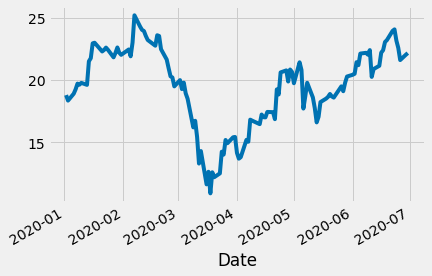

In [70]:
# Plotting a Close Price Chart
prices.Close.plot()

In [71]:
# Let's calculate MACD and signal line indicators

# Short term exponential moving average (EMA)
shortEMA = prices.Close.ewm(span = 12, adjust = False).mean()

# Long term exponential moving average (EMA)
longEMA = prices.Close.ewm(span = 26, adjust = False).mean()

# MACD line
MACD = shortEMA - longEMA

# Signal line
signal = MACD.ewm(span = 9, adjust = False).mean()


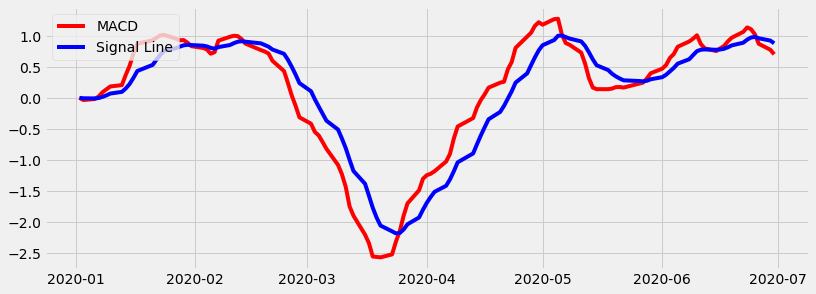

In [74]:
# Let's plot indicators
pp.figure(figsize = (12.2, 4.5))
pp.plot(prices.index, MACD, label = 'MACD', color = 'red')
pp.plot(prices.index, signal, label = 'Signal Line', color = 'blue')
pp.legend(loc = 'upper left')
pp.show()

In [75]:
# Create new columns for the data
prices['MACD'] = MACD
prices['Signal Line'] = signal
prices

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD,Signal Line
Date,,,,,,,,,
2020-01-02,18.80,19.10,18.57,18.80,6334600,0,0,0.000000,0.000000
2020-01-03,18.60,18.71,18.25,18.36,5203200,0,0,-0.035100,-0.007020
2020-01-06,18.27,19.35,18.22,18.91,7978900,0,0,-0.018325,-0.009281
2020-01-07,18.88,19.42,18.76,19.26,7471500,0,0,0.022947,-0.002835
2020-01-08,19.25,19.98,19.11,19.72,7363500,0,0,0.091716,0.016075
...,...,...,...,...,...,...,...,...,...
2020-06-24,23.82,24.17,22.35,23.17,12040000,0,0,1.105926,0.971171
2020-06-25,22.94,23.49,22.36,22.58,12023100,0,0,1.023842,0.981705
2020-06-26,22.69,23.74,21.25,21.61,45955800,0,0,0.870485,0.959461


In [76]:
# Create a function to signal when to buy and sell an asset
def buy_sell(signal):
    buy = []
    sell = []
    flag = -1
    
    for i in range(0, len(signal)):
        
        if signal['MACD'][i] > signal['Signal Line'][i]:
            sell.append(np.nan)
            if flag != 1:
                buy.append(signal['Close'][i])
                flag = 1
            else:
                buy.append(np.nan)
                
        elif signal['MACD'][i] < signal['Signal Line'][i]:
            buy.append(np.nan)
            if flag != 0:
                sell.append(signal['Close'][i])
                flag = 0
            else:
                sell.append(np.nan)
        else:
            buy.append(np.nan)
            sell.append(np.nan)
    return (buy, sell)

In [77]:
# Create Buy and Sell column
a = buy_sell(prices)
prices['Buy_Signal_Price'] = a[0]
prices['Sell_Signal_Price'] = a[1]

In [78]:
prices

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,,
2020-01-02,18.80,19.10,18.57,18.80,6334600,0,0,0.000000,0.000000,NaN,NaN
2020-01-03,18.60,18.71,18.25,18.36,5203200,0,0,-0.035100,-0.007020,NaN,18.36
2020-01-06,18.27,19.35,18.22,18.91,7978900,0,0,-0.018325,-0.009281,NaN,NaN
2020-01-07,18.88,19.42,18.76,19.26,7471500,0,0,0.022947,-0.002835,19.26,NaN
2020-01-08,19.25,19.98,19.11,19.72,7363500,0,0,0.091716,0.016075,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,23.82,24.17,22.35,23.17,12040000,0,0,1.105926,0.971171,NaN,NaN
2020-06-25,22.94,23.49,22.36,22.58,12023100,0,0,1.023842,0.981705,NaN,NaN
2020-06-26,22.69,23.74,21.25,21.61,45955800,0,0,0.870485,0.959461,NaN,21.61


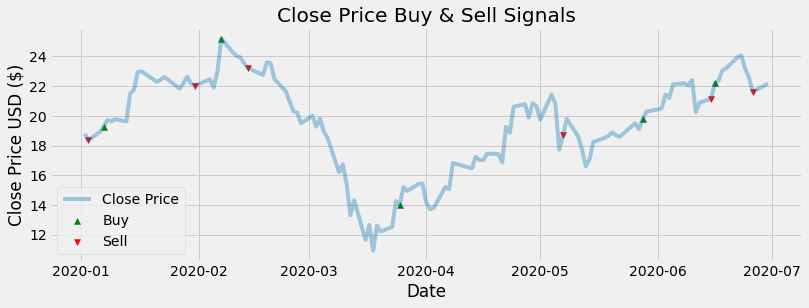

In [85]:
# Visually show the stock buy and sell signals
pp.figure(figsize = (12, 4))
pp.scatter(prices.index, prices['Buy_Signal_Price'], color = 'green', label = 'Buy', marker = '^', alpha = 1)
pp.scatter(prices.index, prices['Sell_Signal_Price'], color = 'red', label = 'Sell', marker = 'v', alpha = 1)
pp.plot(prices.Close, label = 'Close Price', alpha = 0.35)
pp.title('Close Price Buy & Sell Signals')
pp.xlabel('Date')
pp.ylabel('Close Price USD ($)')
pp.legend(loc = 'lower left')

In [152]:
# Now, let's put everything together!

def actions(stock = 'PINS', start = '2020-01-01', end = '2020-07-01'):
    
    # Getting the data
    ticker = yf.Ticker(stock)
    prices = ticker.history(period='1d', start=start, end=end)
    
    # Calculating the indicators
    shortEMA = prices.Close.ewm(span = 12, adjust = False).mean()
    longEMA = prices.Close.ewm(span = 26, adjust = False).mean()
    MACD = shortEMA - longEMA
    signal = MACD.ewm(span = 9, adjust = False).mean()
    
    # Creating buy and sell events
    buy = []
    sell = []
    flag = -1
    long_short = []
    
    for i in range(0, len(signal)):
        
        if MACD[i] > signal[i]:
            sell.append(np.nan)
            long_short.append('long')
            if flag != 1:
                buy.append(prices.Close[i])
                flag = 1
            else:
                buy.append(np.nan)
                
        elif MACD[i] < signal[i]:
            buy.append(np.nan)
            long_short.append('short')
            if flag != 0:
                sell.append(prices.Close[i])
                flag = 0
            else:
                sell.append(np.nan)
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            long_short.append(np.nan)
    
    prices['MACD'] = MACD
    prices['Signal Line'] = signal
    prices['Buy_Signal_Price'] = buy
    prices['Sell_Signal_Price'] = sell
    prices['MACD_Long_Short'] = long_short    
    
    # Plot the final chart
    
    pp.figure(figsize = (12, 4))
    pp.scatter(prices.index, prices['Buy_Signal_Price'], color = 'green', label = 'Buy', marker = '^', alpha = 1)
    pp.scatter(prices.index, prices['Sell_Signal_Price'], color = 'red', label = 'Sell', marker = 'v', alpha = 1)
    pp.plot(prices.Close, label = 'Close Price', alpha = 0.35)
    pp.title('Close Price Buy & Sell Signals for ' + stock)
    pp.xlabel('Date')
    pp.ylabel('Close Price USD ($)')
    pp.legend(loc = 'lower left')
    
    return prices

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price,MACD_Long_Short
Date,,,,,,,,,,,,
2020-01-02,1.38,1.45,1.38,1.41,785700,0,0,0.000000,0.000000,NaN,NaN,NaN
2020-01-03,1.38,1.48,1.38,1.45,870800,0,0,0.003191,0.000638,1.45,NaN,long
2020-01-06,1.50,1.54,1.46,1.53,1471100,0,0,0.012036,0.002918,NaN,NaN,long
2020-01-07,1.53,1.59,1.51,1.54,701600,0,0,0.019627,0.006260,NaN,NaN,long
2020-01-08,1.57,1.57,1.45,1.47,928200,0,0,0.019766,0.008961,NaN,NaN,long
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,0.73,0.75,0.69,0.71,765300,0,0,0.049260,0.065466,NaN,NaN,short
2020-06-25,0.70,0.75,0.70,0.71,460700,0,0,0.041593,0.060691,NaN,NaN,short
2020-06-26,0.71,0.72,0.68,0.70,740100,0,0,0.034314,0.055416,NaN,NaN,short


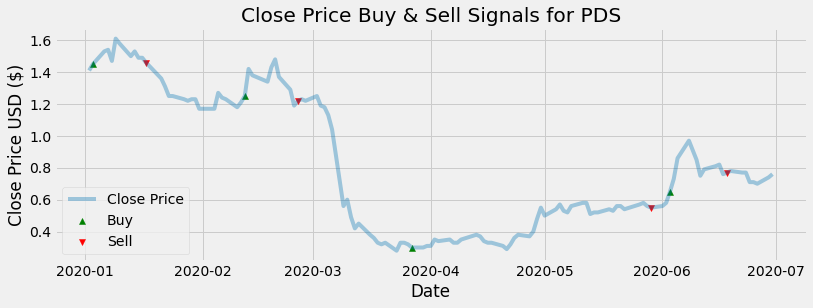

In [153]:
actions('PDS')